### This noteboook is used to train and evaluate reinforcement learning models within the Gym Web Environment
*Gym Environment, Research and modelling all done by Thomas Van der Molen*

Let's start of by registering the custom web environment

In [3]:
import gym

# Register the environment
gym.register(
    id='WebEnv-v0',
    entry_point='Environments.Gym.WebEnvironment:WebEnv',
    kwargs={'url': None, 'keywords': [], 'rewards': {}}
)

c:\Users\Sugar\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\envs\registration.py:498: UserWarning: WARN: Overriding environment WebEnv-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


Next, lets create the environment and just test it out

In [5]:
import gym
target_url = "https://webadventure.thomasmolen.com/"
env = gym.make('WebEnv-v0',
            render_mode='human',
            keywords=['password'],
            url=target_url)
            
try:
    state, info = env.reset()
    rewards = []
    i = 0
    while i < 1000:
        i += 1
        action = env.action_space.sample()
        state, reward, terminated, done, info = env.step(action)
        rewards.append(reward)
        if terminated or done:
            print("Environment was closed after {} steps".format(i+1))
            break
        if (not info["url"].startswith(target_url)):
            print("Agent navigated to a different target site")
            break
    env.close()
except:
    # Ensure that if the environment fails for some reason, it is properly closed, this could also be a notebook interupt
    env.close()

c:\Users\Sugar\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:137: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'int'>
  logger.warn(
c:\Users\Sugar\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\spaces\box.py:227: UserWarning: WARN: Casting input x to numpy array.
  logger.warn("Casting input x to numpy array.")
c:\Users\Sugar\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
c:\Users\Sugar\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(
c:\Users

Agent navigated to a different target site


Let's take a look at the reward distribution while doing random actions, for context, the rewards table is printed below.  
Keep in mind, this table can be edited when creating the environment, this is just the default values    
| CATEGORY | TRIGGER | REWARD |
|----------|---------|--------|
| LOGS     | SEVERE  | 100    |
| LOGS     | WARNING | 50     |
| LOGS     | INFO    | 0      |
| ACTIONS  | FAIL    | -100   |

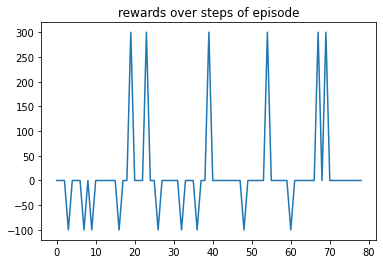

In [6]:
import matplotlib.pyplot as plt

plt.plot(rewards)
plt.title("rewards over steps of episode")

plt.show()

From the rewards given over steps, it seems clear that there are certain elements on the page that cause the action of the model to fail, this could be disabled buttons, and when a reward was given it was always 300, so there does seem to be some error in the application, and it seems to be multiple errors that are triggered by given actions

The one, non-standard behavior of this environment, is that rewards are not actually given out on a step basis but on a multi-step basis that ends in the interact action, so lets model keepign that in mind

In [7]:
env.action_space

Discrete(2)

In [9]:
target_url = "https://webadventure.thomasmolen.com/"
env = gym.make('WebEnv-v0',
            render_mode='human',
            keywords=['password'],
            url=target_url)
            
try:
    state, info = env.reset()
    rewards = []
    i = 0
    while i < 100:
        i += 1
        action = env.action_space.sample()
        state, reward, terminated, done, info = env.step(action)
        if (action == 1):
            rewards.append(reward)
        if terminated or done:
            print("Environment was closed after {} steps".format(i+1))
            break
        if (not info["url"].startswith(target_url)):
            print("Agent navigated to a different target site")
            break
    env.close()
except:
    # Ensure that if the environment fails for some reason, it is properly closed, this could also be a notebook interupt
    env.close()

c:\Users\Sugar\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:137: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'int'>
  logger.warn(
c:\Users\Sugar\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\spaces\box.py:227: UserWarning: WARN: Casting input x to numpy array.
  logger.warn("Casting input x to numpy array.")
c:\Users\Sugar\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
c:\Users\Sugar\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:137: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'int'>
  logger.warn(
c:\Users\Sugar\AppData\Local\Programs\Python\Python3

Agent navigated to a different target site


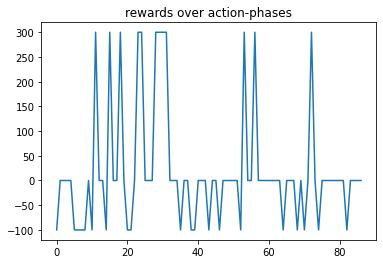

In [10]:
plt.plot(rewards)
plt.title("rewards over action-phases")

plt.show()

This gives a slightly better idea of the effect certain actions actually had on the environment, as there are still clearly some actions that fail, probably a certain combination of actions that causes multiple errors, but also actions that cause no direct error

Next, lets actually observe per action phase what is happening

In [48]:
target_url = "https://webadventure.thomasmolen.com/"
env = gym.make('WebEnv-v0',
            render_mode='headless',
            keywords=['password'],
            url=target_url)
            
try:
    state, info = env.reset()
    rewards = []
    i = 0
    action_phase = 0
    while i < 100:
        i += 1
        action = env.action_space.sample()
        state, reward, terminated, done, info = env.step(action)
        rewards.append({"reward": reward, "phase": action_phase})
        if (action == 1):
            if (reward != 0):
                action_phase += 1
                env.reset()
        if terminated or done:
            print("Environment was closed after {} steps".format(i+1))
            break
        if (not info["url"].startswith(target_url)):
            env.reset()
    env.close()
except:
    # Ensure that if the environment fails for some reason, it is properly closed, this could also be a notebook interupt
    env.close()

c:\Users\Sugar\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:137: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'int'>
  logger.warn(
c:\Users\Sugar\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\spaces\box.py:227: UserWarning: WARN: Casting input x to numpy array.
  logger.warn("Casting input x to numpy array.")
c:\Users\Sugar\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
c:\Users\Sugar\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:137: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'int'>
  logger.warn(
c:\Users\Sugar\AppData\Local\Programs\Python\Python3

Split the results into their own action_phase

In [68]:
def display_phases(phases, title = ""):
    # Calculate the number of rows and columns dynamically
    num_elements = len(phases)
    num_rows = int(num_elements ** 0.5)
    num_cols = (num_elements + num_rows - 1) // num_rows

    # Create subplots with a specified layout and spacing
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    fig.suptitle(title)
    # Flatten the axes array if it's not 2D
    axes = axes.flatten() if num_elements > 1 else [axes]

    # Iterate through action phases and plot rewards
    for i, rewards in enumerate(phases):
        ax = axes[i]
        ax.plot(rewards)

    # Remove any remaining empty subplots
    for i in range(num_elements, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

In [49]:
# Create dict with entry per phase
rewards_by_phase = {}
for reward in rewards:
    action_reward = reward["reward"]
    action_phase = reward["phase"]
    if action_phase not in rewards_by_phase:
        rewards_by_phase[action_phase] = []
    rewards_by_phase[action_phase].append(action_reward)
# Convert dict into list
rewards_by_phase = list(rewards_by_phase.values())

In [60]:
positive_phases = []
negative_phases = []

for phase in rewards_by_phase:
    sum_value = sum(phase)
    if sum_value >= 0:
        positive_phases.append(phase)
    else:
        negative_phases.append(phase)

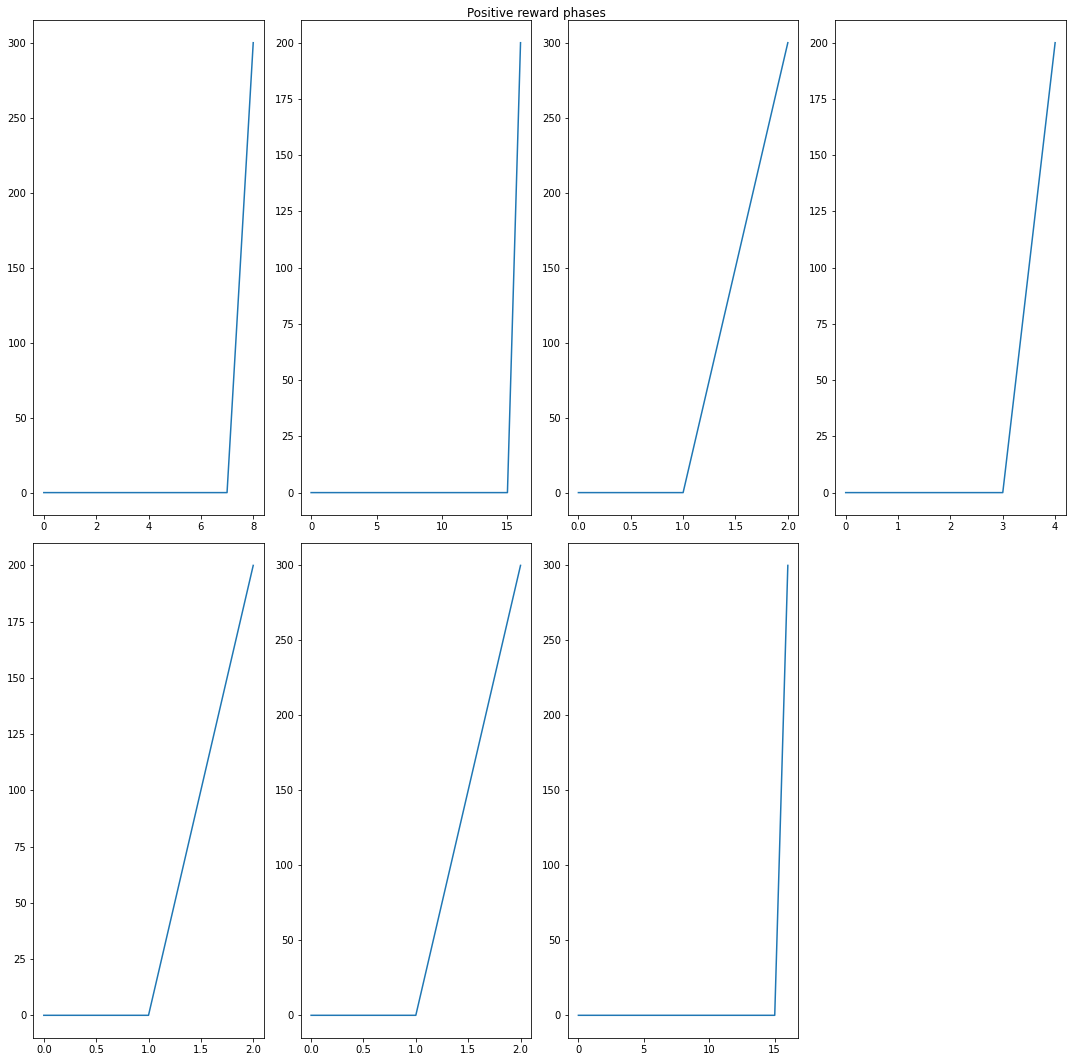

In [72]:
display_phases(positive_phases, "Positive reward phases")

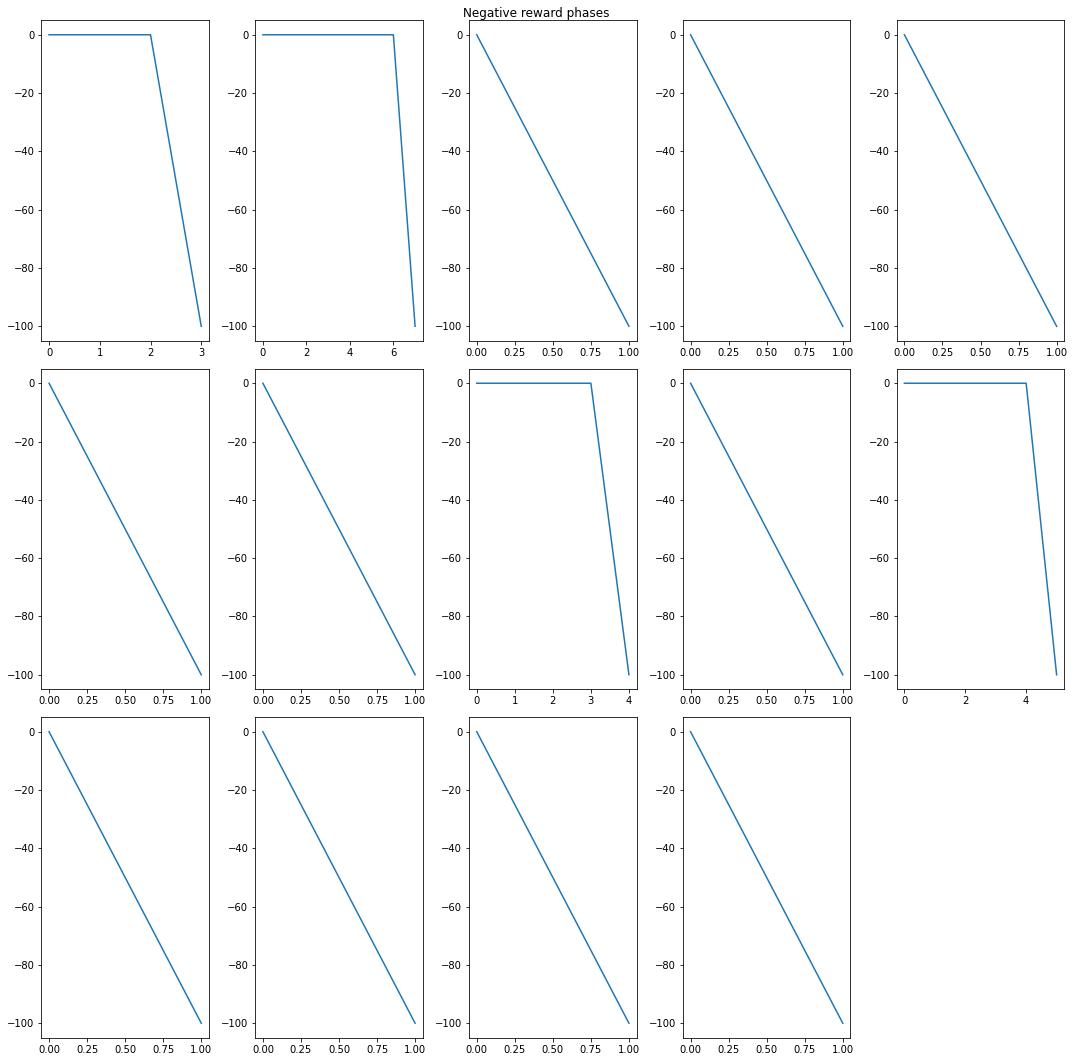

In [71]:
display_phases(negative_phases, "Negative reward phases")

Above, we can actually see that for both positive and negatively actions, generally atleast an action has to take place before any kind of reward can be received, this can be selecting the correct element, or possibly opening a form.  
Especially with the net negative phases, it is pretty clear that either the second selected element, or the first element interacted with twice causes some kind of incorrect action that we want to avoid

### Now that we have a bit of a better understanding of how the whole system behaves, lets train an agent to actually become better at finding the positive action-phases

Before we can start using an agent in the environment, we first have to set one up, based on research done we will be using [this rainbow agent](https://github.com/Curt-Park/rainbow-is-all-you-need?tab=readme-ov-file), which will require some setup for its various modules, if you need a recap on the general ideas behind a DQN and rainbow agents check out this [great video](https://www.youtube.com/watch?v=lUpW1OlJmsc)

In [1]:
import math
import os
import random
from collections import deque
from typing import Deque, Dict, List, Tuple

import gym
from gym import spaces
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from IPython.display import clear_output
from torch.nn.utils import clip_grad_norm_

from segment_tree import MinSegmentTree, SumSegmentTree # NOTE: This comes from the local segment_tree.py file, which is a fork from the OPENAI segment_tree

Setup the replay buffer

In [2]:
class ReplayBuffer:
    """A simple numpy replay buffer."""

    def __init__(
        self, 
        obs_dim: int, 
        size: int, 
        batch_size: int = 32, 
        n_step: int = 1, 
        gamma: float = 0.99
    ):
        self.obs_buf = np.zeros([size, obs_dim], dtype=np.float32)
        self.next_obs_buf = np.zeros([size, obs_dim], dtype=np.float32)
        self.acts_buf = np.zeros([size], dtype=np.float32)
        self.rews_buf = np.zeros([size], dtype=np.float32)
        self.done_buf = np.zeros(size, dtype=np.float32)
        self.max_size, self.batch_size = size, batch_size
        self.ptr, self.size, = 0, 0
        
        # for N-step Learning
        self.n_step_buffer = deque(maxlen=n_step)
        self.n_step = n_step
        self.gamma = gamma

    def store(
        self, 
        obs: np.ndarray, 
        act: np.ndarray, 
        rew: float, 
        next_obs: np.ndarray, 
        done: bool,
    ) -> Tuple[np.ndarray, np.ndarray, float, np.ndarray, bool]:
        transition = (obs, act, rew, next_obs, done)
        self.n_step_buffer.append(transition)

        # single step transition is not ready
        if len(self.n_step_buffer) < self.n_step:
            return ()
        
        # make a n-step transition
        rew, next_obs, done = self._get_n_step_info(
            self.n_step_buffer, self.gamma
        )
        obs, act = self.n_step_buffer[0][:2]
        
        self.obs_buf[self.ptr] = obs
        self.next_obs_buf[self.ptr] = next_obs
        self.acts_buf[self.ptr] = act
        self.rews_buf[self.ptr] = rew
        self.done_buf[self.ptr] = done
        self.ptr = (self.ptr + 1) % self.max_size
        self.size = min(self.size + 1, self.max_size)
        
        return self.n_step_buffer[0]

    def sample_batch(self) -> Dict[str, np.ndarray]:
        idxs = np.random.choice(self.size, size=self.batch_size, replace=False)

        return dict(
            obs=self.obs_buf[idxs],
            next_obs=self.next_obs_buf[idxs],
            acts=self.acts_buf[idxs],
            rews=self.rews_buf[idxs],
            done=self.done_buf[idxs],
            # for N-step Learning
            indices=idxs,
        )
    
    def sample_batch_from_idxs(
        self, idxs: np.ndarray
    ) -> Dict[str, np.ndarray]:
        # for N-step Learning
        return dict(
            obs=self.obs_buf[idxs],
            next_obs=self.next_obs_buf[idxs],
            acts=self.acts_buf[idxs],
            rews=self.rews_buf[idxs],
            done=self.done_buf[idxs],
        )
    
    def _get_n_step_info(
        self, n_step_buffer: Deque, gamma: float
    ) -> Tuple[np.int64, np.ndarray, bool]:
        """Return n step rew, next_obs, and done."""
        # info of the last transition
        rew, next_obs, done = n_step_buffer[-1][-3:]

        for transition in reversed(list(n_step_buffer)[:-1]):
            r, n_o, d = transition[-3:]

            rew = r + gamma * rew * (1 - d)
            next_obs, done = (n_o, d) if d else (next_obs, done)

        return rew, next_obs, done

    def __len__(self) -> int:
        return self.size

Prioritized Experience

In [3]:
class PrioritizedReplayBuffer(ReplayBuffer):
    """Prioritized Replay buffer.
    
    Attributes:
        max_priority (float): max priority
        tree_ptr (int): next index of tree
        alpha (float): alpha parameter for prioritized replay buffer
        sum_tree (SumSegmentTree): sum tree for prior
        min_tree (MinSegmentTree): min tree for min prior to get max weight
        
    """
    
    def __init__(
        self, 
        obs_dim: int, 
        size: int, 
        batch_size: int = 32, 
        alpha: float = 0.6,
        n_step: int = 1, 
        gamma: float = 0.99,
    ):
        """Initialization."""
        assert alpha >= 0
        
        super(PrioritizedReplayBuffer, self).__init__(
            obs_dim, size, batch_size, n_step, gamma
        )
        self.max_priority, self.tree_ptr = 1.0, 0
        self.alpha = alpha
        
        # capacity must be positive and a power of 2.
        tree_capacity = 1
        while tree_capacity < self.max_size:
            tree_capacity *= 2

        self.sum_tree = SumSegmentTree(tree_capacity)
        self.min_tree = MinSegmentTree(tree_capacity)
        
    def store(
        self, 
        obs: np.ndarray, 
        act: int, 
        rew: float, 
        next_obs: np.ndarray, 
        done: bool,
    ) -> Tuple[np.ndarray, np.ndarray, float, np.ndarray, bool]:
        """Store experience and priority."""
        transition = super().store(obs, act, rew, next_obs, done)
        
        if transition:
            self.sum_tree[self.tree_ptr] = self.max_priority ** self.alpha
            self.min_tree[self.tree_ptr] = self.max_priority ** self.alpha
            self.tree_ptr = (self.tree_ptr + 1) % self.max_size
        
        return transition

    def sample_batch(self, beta: float = 0.4) -> Dict[str, np.ndarray]:
        """Sample a batch of experiences."""
        assert len(self) >= self.batch_size
        assert beta > 0
        
        indices = self._sample_proportional()
        
        obs = self.obs_buf[indices]
        next_obs = self.next_obs_buf[indices]
        acts = self.acts_buf[indices]
        rews = self.rews_buf[indices]
        done = self.done_buf[indices]
        weights = np.array([self._calculate_weight(i, beta) for i in indices])
        
        return dict(
            obs=obs,
            next_obs=next_obs,
            acts=acts,
            rews=rews,
            done=done,
            weights=weights,
            indices=indices,
        )
        
    def update_priorities(self, indices: List[int], priorities: np.ndarray):
        """Update priorities of sampled transitions."""
        assert len(indices) == len(priorities)

        for idx, priority in zip(indices, priorities):
            assert priority > 0
            assert 0 <= idx < len(self)

            self.sum_tree[idx] = priority ** self.alpha
            self.min_tree[idx] = priority ** self.alpha

            self.max_priority = max(self.max_priority, priority)
            
    def _sample_proportional(self) -> List[int]:
        """Sample indices based on proportions."""
        indices = []
        p_total = self.sum_tree.sum(0, len(self) - 1)
        segment = p_total / self.batch_size
        
        for i in range(self.batch_size):
            a = segment * i
            b = segment * (i + 1)
            upperbound = random.uniform(a, b)
            idx = self.sum_tree.retrieve(upperbound)
            indices.append(idx)
            
        return indices
    
    def _calculate_weight(self, idx: int, beta: float):
        """Calculate the weight of the experience at idx."""
        # get max weight
        p_min = self.min_tree.min() / self.sum_tree.sum()
        max_weight = (p_min * len(self)) ** (-beta)
        
        # calculate weights
        p_sample = self.sum_tree[idx] / self.sum_tree.sum()
        weight = (p_sample * len(self)) ** (-beta)
        weight = weight / max_weight
        
        return weight

Noisy layer for the DQN, instead of epsilon greedy exploration v exploitation

In [4]:
class NoisyLinear(nn.Module):
    """Noisy linear module for NoisyNet.
    
    
        
    Attributes:
        in_features (int): input size of linear module
        out_features (int): output size of linear module
        std_init (float): initial std value
        weight_mu (nn.Parameter): mean value weight parameter
        weight_sigma (nn.Parameter): std value weight parameter
        bias_mu (nn.Parameter): mean value bias parameter
        bias_sigma (nn.Parameter): std value bias parameter
        
    """

    def __init__(
        self, 
        in_features: int, 
        out_features: int, 
        std_init: float = 0.5,
    ):
        """Initialization."""
        super(NoisyLinear, self).__init__()
        
        self.in_features = in_features
        self.out_features = out_features
        self.std_init = std_init

        self.weight_mu = nn.Parameter(torch.Tensor(out_features, in_features))
        self.weight_sigma = nn.Parameter(
            torch.Tensor(out_features, in_features)
        )
        self.register_buffer(
            "weight_epsilon", torch.Tensor(out_features, in_features)
        )

        self.bias_mu = nn.Parameter(torch.Tensor(out_features))
        self.bias_sigma = nn.Parameter(torch.Tensor(out_features))
        self.register_buffer("bias_epsilon", torch.Tensor(out_features))

        self.reset_parameters()
        self.reset_noise()

    def reset_parameters(self):
        """Reset trainable network parameters (factorized gaussian noise)."""
        mu_range = 1 / math.sqrt(self.in_features)
        self.weight_mu.data.uniform_(-mu_range, mu_range)
        self.weight_sigma.data.fill_(
            self.std_init / math.sqrt(self.in_features)
        )
        self.bias_mu.data.uniform_(-mu_range, mu_range)
        self.bias_sigma.data.fill_(
            self.std_init / math.sqrt(self.out_features)
        )

    def reset_noise(self):
        """Make new noise."""
        epsilon_in = self.scale_noise(self.in_features)
        epsilon_out = self.scale_noise(self.out_features)

        # outer product
        self.weight_epsilon.copy_(epsilon_out.ger(epsilon_in))
        self.bias_epsilon.copy_(epsilon_out)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward method implementation.
        
        We don't use separate statements on train / eval mode.
        It doesn't show remarkable difference of performance.
        """
        return F.linear(
            x,
            self.weight_mu + self.weight_sigma * self.weight_epsilon,
            self.bias_mu + self.bias_sigma * self.bias_epsilon,
        )
    
    @staticmethod
    def scale_noise(size: int) -> torch.Tensor:
        """Set scale to make noise (factorized gaussian noise)."""
        x = torch.randn(size)

        return x.sign().mul(x.abs().sqrt())

DQN network architecture

In [5]:
class Network(nn.Module):
    def __init__(
        self, 
        in_dim: int, 
        out_dim: int, 
        atom_size: int, 
        support: torch.Tensor
    ):
        """Initialization."""
        super(Network, self).__init__()
        
        self.support = support
        self.out_dim = out_dim
        self.atom_size = atom_size

        # set common feature layer
        self.feature_layer = nn.Sequential(
            nn.Linear(in_dim, 128), 
            nn.ReLU(),
        )
        
        # set advantage layer
        self.advantage_hidden_layer = NoisyLinear(128, 128)
        self.advantage_layer = NoisyLinear(128, out_dim * atom_size)

        # set value layer
        self.value_hidden_layer = NoisyLinear(128, 128)
        self.value_layer = NoisyLinear(128, atom_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward method implementation."""
        dist = self.dist(x)
        q = torch.sum(dist * self.support, dim=2)
        
        return q
    
    def dist(self, x: torch.Tensor) -> torch.Tensor:
        """Get distribution for atoms."""
        feature = self.feature_layer(x)
        adv_hid = F.relu(self.advantage_hidden_layer(feature))
        val_hid = F.relu(self.value_hidden_layer(feature))
        
        advantage = self.advantage_layer(adv_hid).view(
            -1, self.out_dim, self.atom_size
        )
        value = self.value_layer(val_hid).view(-1, 1, self.atom_size)
        q_atoms = value + advantage - advantage.mean(dim=1, keepdim=True)
        
        dist = F.softmax(q_atoms, dim=-1)
        dist = dist.clamp(min=1e-3)  # for avoiding nans
        
        return dist
    
    def reset_noise(self):
        """Reset all noisy layers."""
        self.advantage_hidden_layer.reset_noise()
        self.advantage_layer.reset_noise()
        self.value_hidden_layer.reset_noise()
        self.value_layer.reset_noise()

Create a recursive function that will flatten any dictionary based dynamic spaces, as the normal DQN networks expect a single Box shaped numeric values

In [6]:
def flatten_dict(dictionary):
    results = np.array([], dtype=np.int16)
    if type(dictionary) == dict:
        for values in dictionary.values():
            results = np.append(results, flatten_dict(values))
    else:
        results = np.append(results, dictionary)
    return results

Now to merge it all together into an agent ("Rainbow Agent")

In [7]:
class DQNAgent:
    """DQN Agent interacting with environment.
    
    Attribute:
        env (gym.Env): openAI Gym environment
        memory (PrioritizedReplayBuffer): replay memory to store transitions
        batch_size (int): batch size for sampling
        target_update (int): period for target model's hard update
        gamma (float): discount factor
        dqn (Network): model to train and select actions
        dqn_target (Network): target model to update
        optimizer (torch.optim): optimizer for training dqn
        transition (list): transition information including 
                           state, action, reward, next_state, done
        v_min (float): min value of support
        v_max (float): max value of support
        atom_size (int): the unit number of support
        support (torch.Tensor): support for categorical dqn
        use_n_step (bool): whether to use n_step memory
        n_step (int): step number to calculate n-step td error
        memory_n (ReplayBuffer): n-step replay buffer
    """

    def __init__(
        self, 
        env: gym.Env,
        memory_size: int,
        batch_size: int,
        target_update: int,
        seed: int,
        gamma: float = 0.99,
        # PER parameters
        alpha: float = 0.2,
        beta: float = 0.6,
        prior_eps: float = 1e-6,
        # Categorical DQN parameters
        v_min: float = 0.0,
        v_max: float = 200.0,
        atom_size: int = 51,
        # N-step Learning
        n_step: int = 3,
    ):
        """Initialization.
        
        Args:
            env (gym.Env): openAI Gym environment
            memory_size (int): length of memory
            batch_size (int): batch size for sampling
            target_update (int): period for target model's hard update
            lr (float): learning rate
            gamma (float): discount factor
            alpha (float): determines how much prioritization is used
            beta (float): determines how much importance sampling is used
            prior_eps (float): guarantees every transition can be sampled
            v_min (float): min value of support
            v_max (float): max value of support
            atom_size (int): the unit number of support
            n_step (int): step number to calculate n-step td error
        """
        obs_dim = gym.spaces.utils.flatdim(env.observation_space)
        action_dim = env.action_space.n
        
        self.env = env
        self.batch_size = batch_size
        self.target_update = target_update
        self.seed = seed
        self.gamma = gamma
        # NoisyNet: All attributes related to epsilon are removed
        
        # device: cpu / gpu
        self.device = torch.device(
            "cuda" if torch.cuda.is_available() else "cpu"
        )
        print(self.device)
        
        # PER
        # memory for 1-step Learning
        self.beta = beta
        self.prior_eps = prior_eps
        self.memory = PrioritizedReplayBuffer(
            obs_dim, memory_size, batch_size, alpha=alpha, gamma=gamma
        )
        
        # memory for N-step Learning
        self.use_n_step = True if n_step > 1 else False
        if self.use_n_step:
            self.n_step = n_step
            self.memory_n = ReplayBuffer(
                obs_dim, memory_size, batch_size, n_step=n_step, gamma=gamma
            )
            
        # Categorical DQN parameters
        self.v_min = v_min
        self.v_max = v_max
        self.atom_size = atom_size
        self.support = torch.linspace(
            self.v_min, self.v_max, self.atom_size
        ).to(self.device)

        # networks: dqn, dqn_target
        self.dqn = Network(
            obs_dim, action_dim, self.atom_size, self.support
        ).to(self.device)
        self.dqn_target = Network(
            obs_dim, action_dim, self.atom_size, self.support
        ).to(self.device)
        self.dqn_target.load_state_dict(self.dqn.state_dict())
        self.dqn_target.eval()
        
        # optimizer
        self.optimizer = optim.Adam(self.dqn.parameters())

        # transition to store in memory
        self.transition = list()
        
        # mode: train / test
        self.is_test = False

    def select_action(self, state: np.ndarray) -> np.ndarray:
        """Select an action from the input state."""
        # NoisyNet: no epsilon greedy action selection
        selected_action = self.dqn(
            torch.FloatTensor(state).to(self.device)
        ).argmax()
        selected_action = selected_action.detach().cpu().numpy()
        
        if not self.is_test:
            self.transition = [state, selected_action]
        
        return selected_action

    def step(self, action: np.ndarray) -> Tuple[np.ndarray, np.float64, bool]:
        """Take an action and return the response of the env."""
        next_state, reward, terminated, truncated, info = self.env.step(action)
        next_state = flatten_dict(next_state)
        done = terminated or truncated
            
        if not self.is_test:
            self.transition += [reward, next_state, done]
            
            # N-step transition
            if self.use_n_step:
                one_step_transition = self.memory_n.store(*self.transition)
            # 1-step transition
            else:
                one_step_transition = self.transition

            # add a single step transition
            if one_step_transition:
                self.memory.store(*one_step_transition)
    
        return next_state, reward, done, info

    def update_model(self) -> torch.Tensor:
        """Update the model by gradient descent."""
        # PER needs beta to calculate weights

        samples = self.memory.sample_batch(self.beta)
        weights = torch.FloatTensor(
            samples["weights"].reshape(-1, 1)
        ).to(self.device)
        indices = samples["indices"]
        
        # 1-step Learning loss
        elementwise_loss = self._compute_dqn_loss(samples, self.gamma)
        
        # PER: importance sampling before average
        loss = torch.mean(elementwise_loss * weights)
        
        # N-step Learning loss
        # we are gonna combine 1-step loss and n-step loss so as to
        # prevent high-variance. The original rainbow employs n-step loss only.
        if self.use_n_step:
            gamma = self.gamma ** self.n_step
            samples = self.memory_n.sample_batch_from_idxs(indices)
            elementwise_loss_n_loss = self._compute_dqn_loss(samples, gamma)
            elementwise_loss += elementwise_loss_n_loss
            
            # PER: importance sampling before average
            loss = torch.mean(elementwise_loss * weights)

        self.optimizer.zero_grad()
        loss.backward()
        clip_grad_norm_(self.dqn.parameters(), 10.0)
        self.optimizer.step()
        
        # PER: update priorities
        loss_for_prior = elementwise_loss.detach().cpu().numpy()
        new_priorities = loss_for_prior + self.prior_eps
        self.memory.update_priorities(indices, new_priorities)
        
        # NoisyNet: reset noise
        self.dqn.reset_noise()
        self.dqn_target.reset_noise()

        return loss.item()
        
    def train(self, num_frames: int, plotting_interval: int = 200):
        """Train the agent."""
        self.is_test = False
        
        state, _ = self.env.reset(seed=self.seed)
        state = flatten_dict(state)
        update_cnt = 0
        losses = []
        scores = []
        score = 0

        for frame_idx in range(1, num_frames + 1):
            action = self.select_action(state)
            next_state, reward, done, info = self.step(action)
            next_state = flatten_dict(next_state)

            state = next_state
            score += reward
            
            # NoisyNet: removed decrease of epsilon
            
            # PER: increase beta
            fraction = min(frame_idx / num_frames, 1.0)
            self.beta = self.beta + fraction * (1.0 - self.beta)
            
            # if action-phase completes
            if action == 1:
                # if (score <= 0):
                    # score += -10
                scores.append(score)
                score = 0
            # if episode ends
            if done or not info["url"].startswith(self.env.target_url):
                state, _ = self.env.reset(seed=self.seed)
                state = flatten_dict(state)
                scores.append(score)
                score = 0

            # if training is ready
            if len(self.memory) >= self.batch_size:
                loss = self.update_model()
                losses.append(loss)
                update_cnt += 1
                
                # if hard update is needed
                if update_cnt % self.target_update == 0:
                    self._target_hard_update()
            
            # plotting
            if frame_idx % plotting_interval == 0:
                self._plot(frame_idx, scores, losses)
                
        self.env.close()
                
    def test(self, video_folder: str) -> None:
        """Test the agent."""
        self.is_test = True
        
        # for recording a video
        naive_env = self.env
        self.env = gym.wrappers.RecordVideo(self.env, video_folder=video_folder)
        
        state, _ = self.env.reset(seed=self.seed)
        state = flatten_dict(state)
        done = False
        score = 0
        
        while not done:
            action = self.select_action(state)
            next_state, reward, done, info = self.step(action)
            next_state = flatten_dict(next_state)

            state = next_state
            score += reward
            if (score > 0):
                done = True
        
        print("score: ", score)
        self.env.close()
        
        # reset
        self.env = naive_env

    def _compute_dqn_loss(self, samples: Dict[str, np.ndarray], gamma: float) -> torch.Tensor:
        """Return categorical dqn loss."""
        device = self.device  # for shortening the following lines
        state = torch.FloatTensor(samples["obs"]).to(device)
        next_state = torch.FloatTensor(samples["next_obs"]).to(device)
        action = torch.LongTensor(samples["acts"]).to(device)
        reward = torch.FloatTensor(samples["rews"].reshape(-1, 1)).to(device)
        done = torch.FloatTensor(samples["done"].reshape(-1, 1)).to(device)
        
        # Categorical DQN algorithm
        delta_z = float(self.v_max - self.v_min) / (self.atom_size - 1)

        with torch.no_grad():
            # Double DQN
            next_action = self.dqn(next_state).argmax(1)
            next_dist = self.dqn_target.dist(next_state)
            next_dist = next_dist[range(self.batch_size), next_action]

            t_z = reward + (1 - done) * gamma * self.support
            t_z = t_z.clamp(min=self.v_min, max=self.v_max)
            b = (t_z - self.v_min) / delta_z
            l = b.floor().long()
            u = b.ceil().long()

            offset = (
                torch.linspace(
                    0, (self.batch_size - 1) * self.atom_size, self.batch_size
                ).long()
                .unsqueeze(1)
                .expand(self.batch_size, self.atom_size)
                .to(self.device)
            )

            proj_dist = torch.zeros(next_dist.size(), device=self.device)
            proj_dist.view(-1).index_add_(
                0, (l + offset).view(-1), (next_dist * (u.float() - b)).view(-1)
            )
            proj_dist.view(-1).index_add_(
                0, (u + offset).view(-1), (next_dist * (b - l.float())).view(-1)
            )

        dist = self.dqn.dist(state)
        log_p = torch.log(dist[range(self.batch_size), action])
        elementwise_loss = -(proj_dist * log_p).sum(1)

        return elementwise_loss

    def _target_hard_update(self):
        """Hard update: target <- local."""
        self.dqn_target.load_state_dict(self.dqn.state_dict())
                
    def _plot(
        self, 
        frame_idx: int, 
        scores: List[float], 
        losses: List[float],
    ):
        """Plot the training progresses."""
        clear_output(True)
        plt.figure(figsize=(20, 5))
        plt.subplot(131)
        plt.title('frame %s. score: %s' % (frame_idx, np.mean(scores[-10:])))
        plt.plot(scores)
        plt.subplot(132)
        plt.title('loss')
        plt.plot(losses)
        plt.show()

Register the environment incase we haven't

In [8]:
import gym

# Register the environment
gym.register(
    id='WebEnv-v0',
    entry_point='Environments.Gym.WebEnvironment:WebEnv',
    kwargs={'url': None, 'keywords': [], 'rewards': {}}
)

Create the environment that is now locally registered, initialize all parameters and reproduceable seed, and train the newly created agent

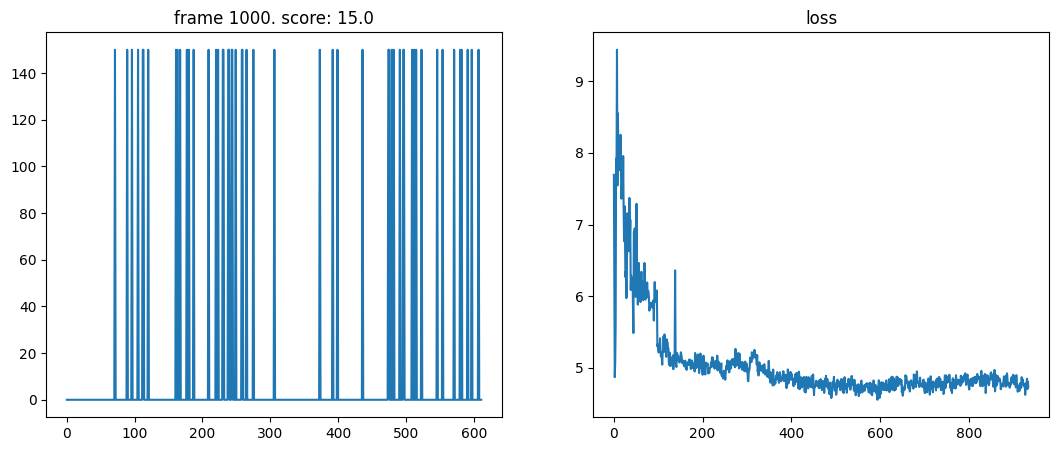

In [21]:
target_url = "https://webadventure.thomasmolen.com/"
env = gym.make('WebEnv-v0',
            render_mode='human',
            keywords=['password', 'error'],
            url=target_url,
            rewards={"LOGS": {"SEVERE": 50}, "ACTIONS": {"FAIL": 0}})
            
seed = 24
# def seed_torch(seed):
#     torch.manual_seed(seed)
#     if torch.backends.cudnn.enabled:
#         torch.cuda.manual_seed(seed)
#         torch.backends.cudnn.benchmark = False
#         torch.backends.cudnn.deterministic = True

# np.random.seed(seed)
# random.seed(seed)
# seed_torch(seed)

# parameters
num_frames = 1000
memory_size = 300
batch_size = 64
target_update = 20

# train
agent = DQNAgent(env, memory_size, batch_size, target_update, seed)
agent.train(num_frames)

LOGS->SEVERE = +100  
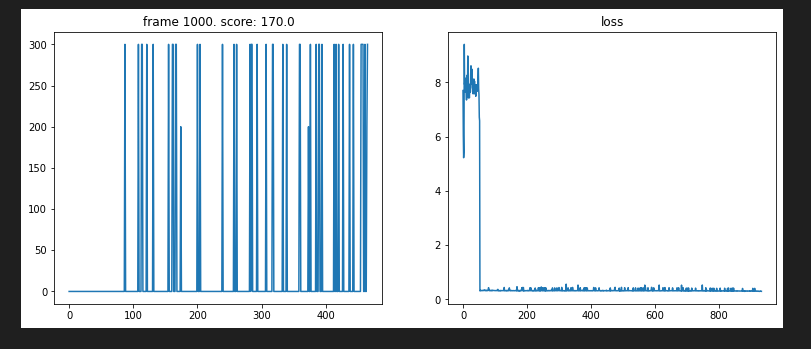

LOGS->SEVERE = +10  
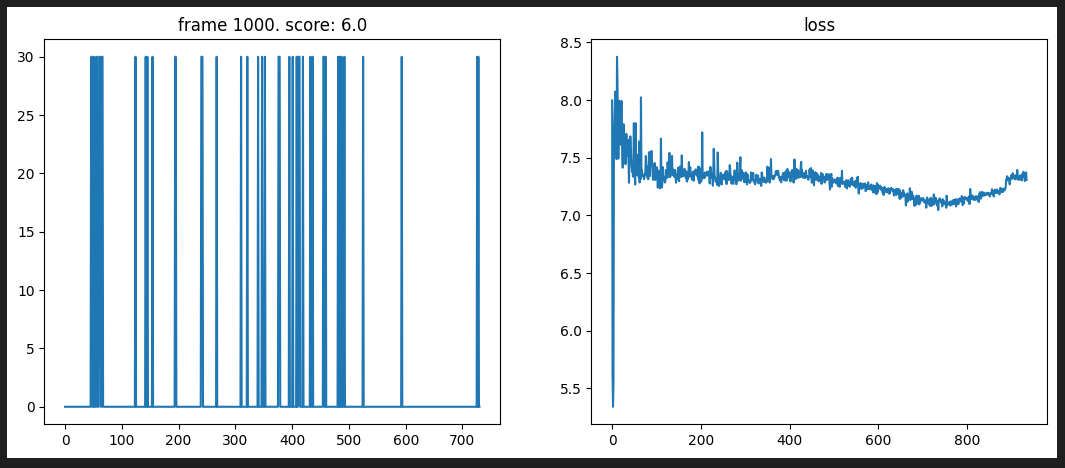